In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

QUESTION 1

In [13]:
"""Testing whether the Women Energy deviate systematically from recommended value 7725 KJ\
   Using Statistical Hypothesis"""
Daily_energy = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]
Alpha = 0.05
Energy_smean = np.mean(Daily_energy)
Energy_degree = len(Daily_energy) -1
Standard_deviation = np.std(Daily_energy, ddof =1)
Standard_error_mean = stats.sem(Daily_energy)
print(f'The Sample Mean of Daily Energy is {Energy_smean}')
print(f'Degree of Freedom is {Energy_degree}')
print(f'The Standard Deviation is {Standard_deviation}')
print(f'The Standard Error of Mean is {Standard_error_mean}\n')

# Using SciPy function to determine Ttest and P values
T_test, p_value = stats.ttest_1samp(Daily_energy, popmean = 7725)
if p_value > Alpha:
    print(f'The Null Hypothesis is significant at P_value = {p_value}')
else:
    print(f'The Null hypothesis is Not Significant at P_value = {p_value}')
    
print('\nThe Ttest:',T_test)
print('The P_value:',p_value)



The Sample Mean of Daily Energy is 6753.636363636364
Degree of Freedom is 10
The Standard Deviation is 1142.1232221373727
The Standard Error of Mean is 344.3631083801271

The Null hypothesis is Not Significant at P_value = 0.018137235176105812

The Ttest: -2.8207540608310193
The P_value: 0.018137235176105812


QUESTION 2

In [14]:
"""Using summary data of two sample Compare the test significancy between ireland\
   elsewhere usig Guiness Overall enjoyment score"""
# Given calculated result of sample data
Sample_ireland = 42
Mean_ireland = 74
Std_ireland = 7.4
Sample_elsewhere = 61
Mean_elsewhere = 57
Std_elsewhere = 7.1
Alpha_level = 0.05
# Due to we have two sample GOES and each is independent this is two sample test
Degree_freedom = (Sample_ireland + Sample_elsewhere)-2
print('The degree of Freedom for two paired test is', Degree_freedom)
Ttest, P_value = stats.ttest_ind_from_stats(Mean_ireland, Std_ireland, Sample_ireland, \
                                           Mean_elsewhere, Std_elsewhere, Sample_elsewhere)
# Using if statement to show if its Null or Alternative Hypothesis and Rounding to four decimal places for better visual

if P_value > Alpha_level:
    print(f'\nThe Null hypothesis is significant on P_value equal {round(P_value, 4)}')
else:
     print(f'\nThe Null hypothesis is not significant for P_value equal {round(P_value, 4)}')
#returning the ttest value and  p value result
print('')
print('The ttest is ', Ttest)
print('the P_value By considering All decimals is', P_value)


The degree of Freedom for two paired test is 101

The Null hypothesis is not significant for P_value equal 0.0

The ttest is  11.73775770205081
the P_value By considering All decimals is 1.3959536155161474e-20


QUESTION 3

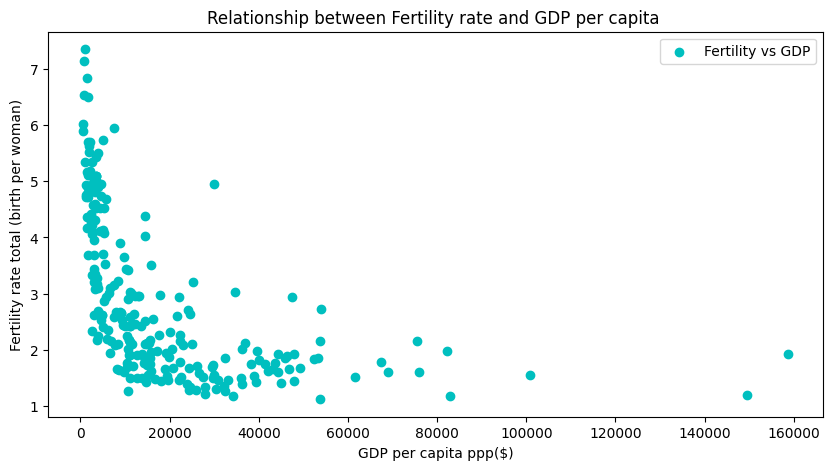

The correlation of GDP per capita and Fertility rate is -0.5150224715836511


In [15]:
"""Analyzing and graphing the relationship between Fertility rate, total(births per woman)\
   versus GDP per capita ppp data from world bank indicator """
Fertility_df = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_5871723.xlsx', sheet_name = 'Data', skiprows = 3)
GDP_df = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_5871851.xlsx', sheet_name = 'Data', skiprows = 3)
Fertility_df_2013 = Fertility_df['2013']   # Exctracting the column data of 2013 from Fertility rate dataframe
GDP_df_2013 = GDP_df['2013']               # Retriving the column of 2013 from GDP dataframe
# plotting Graph of Fertility rate against GDP per capita '2013'
plt.figure(figsize = (10,5))
plt.scatter( GDP_df_2013, Fertility_df_2013, color = 'c', label = 'Fertility vs GDP')
plt.xlabel('GDP per capita ppp($)')
plt.ylabel('Fertility rate total (birth per woman)')
plt.title('Relationship between Fertility rate and GDP per capita ')
plt.legend()
plt.show()
Correlation = GDP_df_2013.corr(Fertility_df_2013)    #Correlation between GDP per capita and Fertility rate total(birth per woman) 
print(f'The correlation of GDP per capita and Fertility rate is {Correlation}')

QUESTION 4

Q4.a

C:\Users\Ange\AppData\Roaming\Python\Python311\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Monthly!$A:$F.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


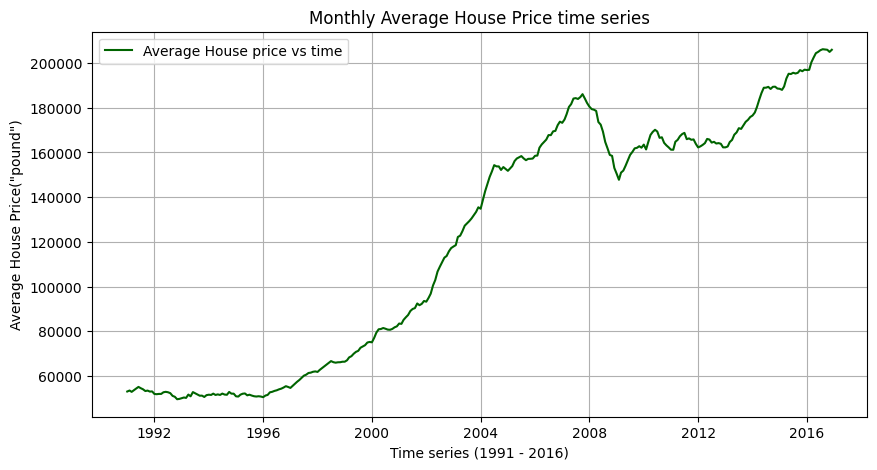

In [9]:
"""Reading the Monthly Average House Price dataset and """
house_df = pd.read_excel('Monthly Average House Price.xlsx')      # Retrieving dataset and form dataframe
House_df = house_df.set_index('Unnamed: 0')    # Seting column of date as index

House_df = House_df['Jan-1991':'Dec-2016']     # extracting the data of data post 1991 
#plotting the Timeseries of average house price  

plt.figure(figsize = (10,5))
plt.plot(House_df.index, House_df['Average House Price'], color = 'darkgreen' , label = "Average House price vs time")
plt.xlabel('Time series (1991 - 2016)')
plt.ylabel('Average House Price("pound")')
plt.title('Monthly Average House Price time series')
plt.legend()
plt.grid()
plt.show()
 

Q4.b

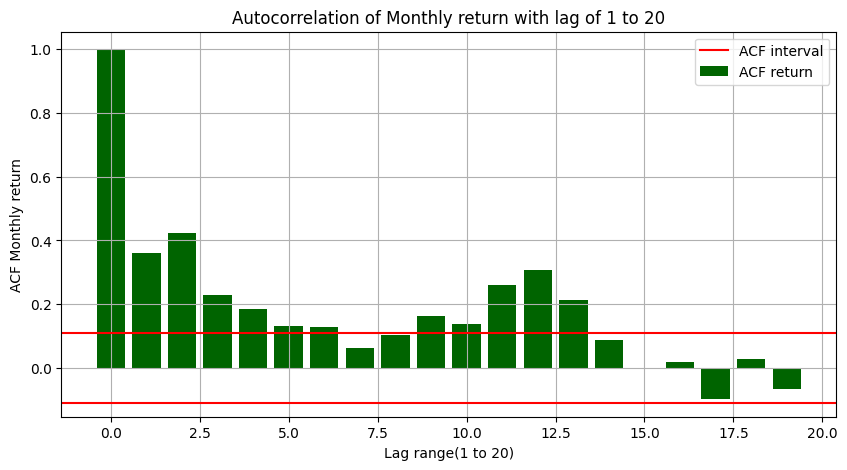

The Annualized return for perion from 1991-2016 is 5.320390788183715%


In [10]:
"""Constructing The Autocorrelation function (ACF) of Monthly returns
   Using the Previous dataset ploting bar graph of ACF Monthly return"""
House_df['Monthly_return'] = House_df['Average House Price'].pct_change() # Calculating Monthly return
house_df = House_df.dropna(subset = ['Monthly_return'])
lagged_range = range(0,20)
ACF = []                     # creating empty list to store the ACF lagged data
for count in lagged_range:
    Hprice_ACF = house_df['Monthly_return'].autocorr(lag = count)
    ACF.append(Hprice_ACF)
#Plotting the ACF bar chart with lag from 1 to 20
plt.figure(figsize = (10,5))
plt.bar(lagged_range, ACF, color = 'darkgreen', label = 'ACF return')
#Indicating horizantal ACF significance level 
plt.axhline(y = -1.96/np.sqrt(len(house_df['Monthly_return'])), color = 'red', label = '')
plt.axhline(y = 1.96/np.sqrt(len(house_df['Monthly_return'])), color = 'red', label = 'ACF interval')
plt.xlabel('Lag range(1 to 20)')
plt.ylabel('ACF Monthly return')
plt.legend()
plt.grid()
plt.title('Autocorrelation of Monthly return with lag of 1 to 20')
plt.show()
# Calculating and showing Annualized return over the period
Initial_price = house_df['Average House Price'].iloc[0]                  # in the column of Average house price choosing the first row
Final_price = house_df['Average House Price'].iloc[310]
n = (2016 - 1991) + 1
House_Annualized_return = (((Final_price / Initial_price)**(1/n)) -1)*100   # formula to find annual retrun
print(f'The Annualized return for perion from 1991-2016 is {House_Annualized_return}%')

QUESTION 5

C:\Users\Ange\AppData\Roaming\Python\Python311\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Monthly!$A:$F.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\Ange\AppData\Local\Temp\ipykernel_8928\2526846844.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTSE_df['Date'] = pd.to_datetime(FTSE_df['Date'].copy(), format='%m/%d/%Y')
C:\Users\Ange\AppData\Local\Temp\ipykernel_8928\2526846844.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

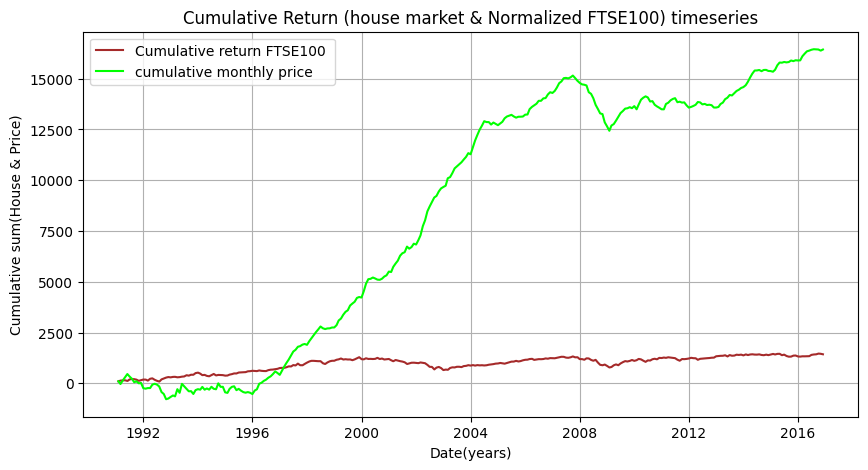

The average Annualized return 4.462515478640672 % 


In [11]:
"""studying and anlyzing FTSE100 dataset and Monthly average House price dataset from previous question\
    and plot their normalized cumulative return on the same chart against time series
       and analyze their annual return and deciding the one to invest in"""
Ftse100_df = pd.read_csv('FTSE100.csv')
House_df = pd.read_excel('Monthly Average House Price.xlsx')
House_df = House_df[['Unnamed: 0', 'Average House Price']]
House_df = House_df.set_index('Unnamed: 0')    # Seting column of date as index
House_df = House_df['Jan 1991':'Dec 2016']
FTSE_df = Ftse100_df[['Date', 'Adj Close']]
FTSE_df['Date'] = pd.to_datetime(FTSE_df['Date'].copy(), format='%m/%d/%Y')
FTSE_df.set_index('Date', inplace  = True)
FTSE_df = FTSE_df.sort_values('Date')
FTSE_df ['Adj_close_return'] = FTSE_df ['Adj Close'].pct_change()
FTSE_df ['Cumulative_sum'] = FTSE_df ['Adj_close_return'].cumsum()
FTSE100_df = FTSE_df.dropna()
Factor_1 = FTSE100_df ['Cumulative_sum'].iloc[0]/100
FTSE100_df['Normalized_cumsum'] = FTSE100_df['Cumulative_sum'] / Factor_1
# Calculate Cumulative sum of Average Monthly House price
House_df['House_price_return'] = House_df['Average House Price'].pct_change()
House_df = House_df.dropna()
House_df['House_cumulativereturn'] = House_df['House_price_return'].cumsum()
Factor_2 = House_df['House_cumulativereturn'].iloc[0]/100
House_df['Normalized_cumreturn'] = House_df['House_cumulativereturn']/ Factor_2
# Plotting Cumulative sum time series 
plt.figure(figsize = (10,5))
#plt.plot(House_df.index, House_df['Houseprice_cumreturn'], color='lime', label='Houseprice Cumulative Return')
plt.plot(FTSE100_df.index, FTSE100_df['Normalized_cumsum'], color = 'brown', label = 'Cumulative return FTSE100 ')
plt.plot(House_df.index, House_df['Normalized_cumreturn'], color = 'lime', label = 'cumulative monthly price')
plt.xlabel('Date(years)')
plt.ylabel('Cumulative sum(House & Price)')
plt.title('Cumulative Return (house market & Normalized FTSE100) timeseries')
plt.legend()
plt.grid()
plt.show()
#Calculating Annualized Return using the Column of Adj Close
Initial = FTSE_df['Adj Close'].iloc[0]
Final = FTSE_df['Adj Close'].iloc[311]
n = (2016 - 1991) + 1
FTSE100_Annualized_return = (((Final / Initial)**(1/n)) -1)*100
print(f'The average Annualized return { FTSE100_Annualized_return} % ')